In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
spam = pd.read_csv('spam.csv')
spam_ans = spam.pop('label')
cancer = pd.read_csv('cancer.csv')
cancer_ans = cancer.pop('label')

In [225]:
m_spam = np.matrix(spam.as_matrix())
m_cancer = np.matrix(cancer.as_matrix())

/home/anastasiia/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/anastasiia/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


**Task 1**

In [226]:
def kNN(dataset, answers, x, k=5):
    dists = []
    for features, answer in zip(dataset, answers):
        d = np.linalg.norm(np.array(features) - x)
        if len(dists) < k or d < dists[-1][0]:
            dists.append([d, answer])
            dists.sort(key=lambda x: x[0])
            if len(dists) > k: dists.pop()
    result = [(i, sum([j[1] == i for j in dists])) for i in set(answers)]
    return result[np.argmax([i[1] for i in result])][0]

def LOO(dataset, ans, inx, k=5):
    dataset_c = dataset.copy()
    ans_c = ans.copy()
    x = dataset_c[inx]
    y = ans_c.pop(inx)
    dataset_d = np.delete(dataset_c, inx, 0)
    return y == kNN(dataset_d, ans_c, x, k)        

In [234]:
LOO(m_spam, spam_ans, np.random.randint(len(m_spam)))

True

**Task 2**

In [245]:
def kNN_arr_output(dataset, answers, x, k=5):
    dists = []
    for features, answer in zip(dataset, answers):
        d = np.linalg.norm(np.array(features) - x)
        if len(dists) < k or d < dists[-1][0]:
            dists.append([d, answer])
            dists.sort(key=lambda x: x[0])
            if len(dists) > k: dists.pop()
    return dists

def fast_LOO(dataset, ans, inx, k_min=1, k_max=10):
    dataset_c = dataset.copy()
    ans_c = ans.copy()
    x = dataset_c[inx]
    y = ans_c.pop(inx)
    dataset_d = np.delete(dataset_c, inx, 0)
    nearests = kNN_arr_output(dataset_d, ans_c, x, k=k_max)
    res = []
    for ix in range(k_min, k_max):
        result = [(i, sum([j[1] == i for j in nearests[:ix]])) for i in set(ans)]
        res.append(result[np.argmax([im[1] for im in result])][0])
    return [y == ans for ans in res]

In [422]:
def plot_LOO(dataset, ans, k_min=1, k_max=10):
    ys = np.array([0 for _ in range(k_max-k_min)])
    for i in range(len(dataset)):
        ys = ys + np.array([int(j) for j in fast_LOO(dataset, ans, i, k_min=k_min, k_max=k_max)])
    plt.title('Accurancy of kNN-method')
    plt.xlabel('Number of neighbours')
    plt.ylabel('Accurancy')
    plt.plot(list(range(k_min, k_max)), [i/len(dataset) for i in ys])
    plt.show()

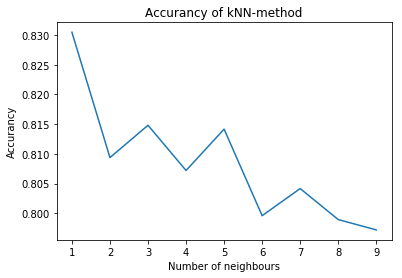

In [427]:
plot_LOO(m_spam, spam_ans)

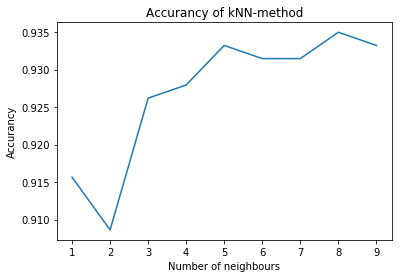

In [428]:
plot_LOO(m_cancer, cancer_ans)

**Task 3**

In [260]:
def RadiusNeighbours(dataset, answers, x, r=5.):
    dists = []
    for features, answer in zip(dataset, answers):
        d = np.linalg.norm(np.array(features) - x)
        if d < r:
            dists.append([d, answer])
    dists.sort(key=lambda x: x[0])
    result = [(i, sum([j[1] == i for j in dists])) for i in set(answers)]
    return result[np.argmax([i[1] for i in result])][0]

def LOO_RN(dataset, ans, inx, r=5.):
    dataset_c = dataset.copy()
    ans_c = ans.copy()
    x = dataset_c[inx]
    y = ans_c.pop(inx)
    dataset_d = np.delete(dataset_c, inx, 0)
    return y == RadiusNeighbours(dataset_d, ans_c, x)    

In [271]:
LOO_RN(m_cancer, cancer_ans, np.random.randint(len(m_cancer)))

True

**Task 4**

In [309]:
def kNNr_output(dataset, answers, x, r=5.):
    dists = []
    for features, answer in zip(dataset, answers):
        d = np.linalg.norm(np.array(features) - x)
        if d < r:
            dists.append([d, answer])
    dists.sort(key=lambda x: x[0])
    return dists

def fast_r_LOO(dataset, ans, inx, x_axis):
    dataset_c = dataset.copy()
    ans_c = ans.copy()
    x = dataset_c[inx]
    y = ans_c.pop(inx)
    dataset_d = np.delete(dataset_c, inx, 0)
    nearests = kNNr_output(dataset_d, ans_c, x, max(x_axis))
    res = []
    for ix in x_axis:
        result = [(i, sum([j[1] == i for j in nearests if j[0] < ix])) for i in set(ans)] # neearests[:np.less_index(ix):]????
        res.append(result[np.argmax([im[1] for im in result])][0])
    return [y == ans for ans in res]

In [425]:
def plot_rLOO(dataset, ans, x_axis):
    ys = np.array([0 for _ in range(len(x_axis))])
    for i in range(len(dataset)):
        ys = ys + np.array([int(j) for j in fast_r_LOO(dataset, ans, i, x_axis)])
    plt.title('Accurancy of radiusNN-method')
    plt.xlabel('Radius of neighbours')
    plt.ylabel('Accurancy')
    plt.plot(x_axis, [i/len(dataset) for i in ys])
    plt.show()
    return ys

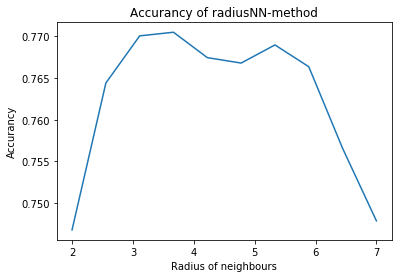

the best radius in x_axis_r is  3.666666666666667


In [429]:
x_axis_r = np.linspace(2,7,10)
goods = plot_rLOO(m_spam, spam_ans, x_axis_r)
print('the best radius in x_axis_r is ', x_axis_r[np.argmax(goods)])

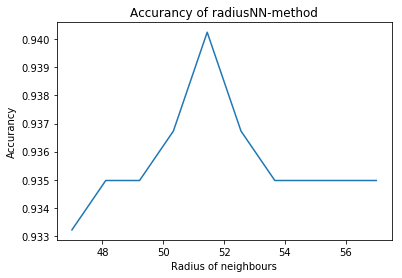

the best radius in x_axis_r is  51.44444444444444


In [460]:
x_axis_r = np.linspace(47,57,10)
goods = plot_rLOO(m_cancer, cancer_ans, x_axis_r)
print('the best radius in x_axis_r is ', x_axis_r[np.argmax(goods)])

**Task 5**

In [349]:
mn_spam = spam.as_matrix()
mn_cancer = cancer.as_matrix()

/home/anastasiia/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/anastasiia/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [431]:
def normalize(dataset):
    mins = [min(dataset.T[inx]) for inx in range(len(dataset[0]))]
    for i in range(len(dataset)):
        for j in range(len(dataset[0])):
            dataset[i][j] -= mins[j]
    maxs = [max(dataset.T[inx]) for inx in range(len(dataset[0]))]
    for i in range(len(dataset)):
        for j in range(len(dataset[0])):
            dataset[i][j] /= maxs[j]    
    return dataset

In [432]:
mn_spam = normalize(mn_spam)
mn_cancer = normalize(mn_cancer)

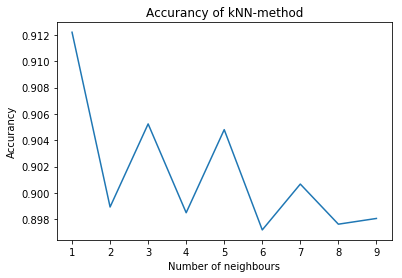

In [433]:
plot_LOO(mn_spam, spam_ans)

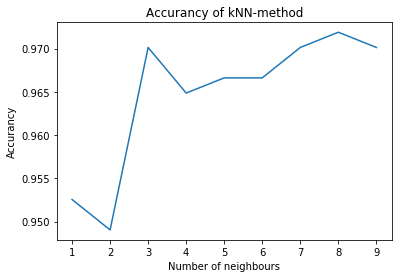

In [434]:
plot_LOO(mn_cancer, cancer_ans)

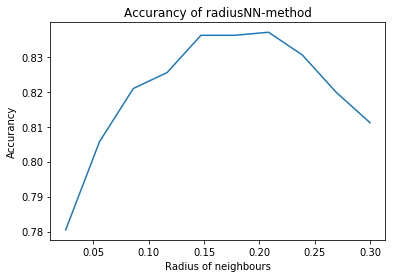

the best radius in x_axis_r is  0.2083333333333333


In [435]:
x_axis_r = np.linspace(0.025, 0.3, 10)
goods = plot_rLOO(mn_spam, spam_ans, x_axis_r)
print('the best radius in x_axis_r is ', x_axis_r[np.argmax(goods)])

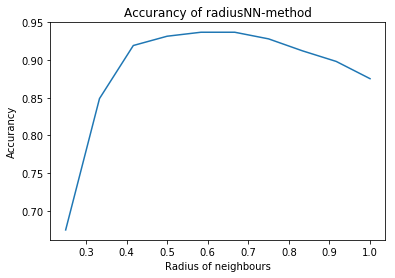

the best radius in x_axis_r is  0.5833333333333333


In [445]:
x_axis_r = np.linspace(0.25, 1, 10)
goods = plot_rLOO(mn_cancer, cancer_ans, x_axis_r)
print('the best radius in x_axis_r is ', x_axis_r[np.argmax(goods)])

**Task 6**

In [437]:
def fast_wr_LOO(dataset, ans, inx, x_axis):
    dataset_c = dataset.copy()
    ans_c = ans.copy()
    x = dataset_c[inx]
    y = ans_c.pop(inx)
    dataset_d = np.delete(dataset_c, inx, 0)
    nearests = kNNr_output(dataset_d, ans_c, x, max(x_axis))
    res = []
    for ix in x_axis:
        result = [(i, sum([(j[1] == i)*max([0, (ix-j[0])/ix]) for j in nearests if j[0] < ix])) for i in set(ans)] # neearests[:np.less_index(ix):]????
        res.append(result[np.argmax([im[1] for im in result])][0])
    return [y == ans for ans in res]

def plot_wrLOO(dataset, ans, x_axis):
    ys = np.array([0 for _ in range(len(x_axis))])
    for i in range(len(dataset)):
        ys = ys + np.array([int(j) for j in fast_wr_LOO(dataset, ans, i, x_axis)])
    plt.title('Accurancy of radiusNN-method')
    plt.xlabel('Radius of neighbours')
    plt.ylabel('Accurancy')
    plt.plot(x_axis, [i/len(dataset) for i in ys])
    plt.show()
    return ys

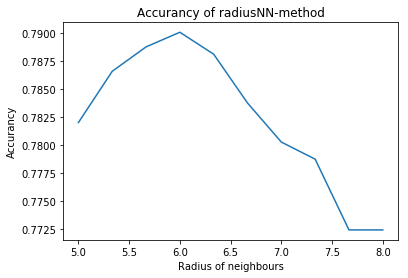

the best radius in x_axis_r is  6.0


In [438]:
x_axis_r = np.linspace(5,8,10)
goods = plot_wrLOO(m_spam, spam_ans, x_axis_r)
print('the best radius in x_axis_r is ', x_axis_r[np.argmax(goods)])

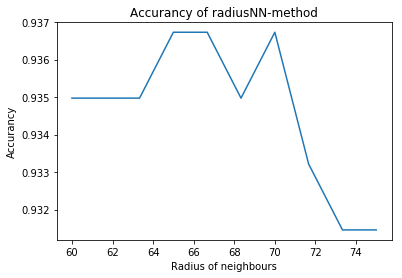

the best radius in x_axis_r is  65.0


In [461]:
x_axis_r = np.linspace(60,75,10)
goods = plot_wrLOO(m_cancer, cancer_ans, x_axis_r)
print('the best radius in x_axis_r is ', x_axis_r[np.argmax(goods)])